# Classification d'images de vêtements Using Deep Neural Network

Dataset: https://www.tensorflow.org/datasets/catalog/fashion_mnist

Fashion MNIST est un jeu de données qui contient 70 000 images en niveaux de gris répartie sur 1 des 10 catégories. Les images montrent des vêtements, d'articles de Zalando , en basse résolution (28 x 28 pixels). La base de données est repartie en un ensemble de 60.000 exemples d'apprentissage et d'un ensemble de 10.000 exemples de test. Cette base de données vise à remplacer le jeu de données MNIST (de chiffres écrit à la main) plus assez complexe dans une logique d'apprentissage automatique.

L'objectif de ce mini projet est la prédiction de la variable cible en utilisant dans un premier temps les algorithmes de Machine Learning traditionnels et dans un second lieu les différentes architectures réseaux de neurones afin de pouvoir comparer les performances obtenues pour les différents modèles utilisés.

Ci-après les différentes étapes de ce projet:

1. Importation et exploration du dataset

2. Utilisation des différents algorithmes Machine Learning traditionnels:

   2.1 Traditional Machine Learning (Régresssion Logistique)

   2.2 Traditional Machine Learning (SVM non linéaire avec un kernel RBF)

3. Utilisation des différentes architectures réseaux de neurones:

   3.1 Classificateur 1: Fully Connected 3 layers NN

   3.2 Observation de l'effet Early Stopping sur le classificateur 1

   3.3 Classificateur 2: CNN avec une architecture LeNet

4. Comparaison des performances obtenues pour les différents modèles utilisés





Importons les librairies dont nous aurons besoin:

In [13]:
# Import matplotlib pour la visualisation
import matplotlib.pyplot as plt
#Import scikit-learn metrics module for our models' evaluations
from sklearn import metrics
# numpy pour les calculs
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

print(tf.__version__)

from tensorflow.keras import datasets, layers, models

2.9.2


# 1. Fashion MNIST Dataset (Loading & Exploration & Data Preparation)

Chargeons et préparons le dataset Fashion MNIST.

Ce dataset comprends 70 000 images, sur echelle de gris, de 28 x 28 pixels. Chaque image represente des vêtements individuels.  

Ces images sont déjà divisée en training 60 000 exemples et Test 10 000 exemples.

Les étiquettes (labels ou y_train) sont un tableau d'entiers, allant de 0 à 9. Ceux-ci correspondent à la classe de vêtements que l'image représente ( x_train):

0	T-shirt/haut
1	Pantalon
2	Pullover
3	Robe
4	Manteau
5	Sandale
6	La chemise
7	Basket
8	Sac
9	Bottine

Chaque image est associée à une seule étiquette. Nous allons stocker les noms de classes pour les utiliser ultérieurement (si besoin).

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Regardons comment sont représentées les données de plus près

In [28]:
#affichons les 20 premières valeurs de y_train
print(y_train[:20])

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]


Les labels sont un array de integers, allant de 0 à 9.

In [29]:
#affichons une valeur au choix de x_train
n= 5
print (x_train[n])

[[  0   0   0   0   1   0   0   0   0  22  88 188 172 132 125 141 199 143
    9   0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0   0  20 131 199 206 196 202 242 255 255 250 222 197
  206 188 126  17   0   0   0   0   0   0]
 [  0   0   0   1   0  35 214 191 183 178 175 168 150 162 159 152 158 179
  183 189 195 185  82   0   0   0   0   0]
 [  0   0   0   0   0 170 190 172 177 176 171 169 162 155 148 154 169 174
  175 175 177 183 188  12   0   0   0   0]
 [  0   0   0   0  25 194 180 178 174 184 187 189 187 184 181 189 200 197
  193 190 178 175 194  90   0   0   0   0]
 [  0   0   0   0  42 218 191 197 208 204 211 209 210 212 211 214 215 213
  214 211 211 191 200 158   0   0   0   0]
 [  0   0   0   0  88 221 215 217 219 211 185 150 118 107  99  88  83  90
  135 212 203 207 219 169   0   0   0   0]
 [  0   0   0   0   0  27 118 162  40   0   0   0  10  19  28  39  47  36
    0   0 203 230 220 203   0   0   0   0]
 [  0   0   0   0 138 136  71  69  54 216 217 203 184 168 163 16

Les valeurs des pixels sont représentés par un nombre de 0 à 255 (le degès de gris).

Affichons une image au choix

<Figure size 432x288 with 0 Axes>

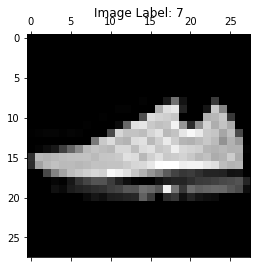

In [30]:
n=870
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(x_train[n]) 
plt.title('Image Label: %i' % y_train[n])
plt.show()

Les données sont déjà réparties en train et test sets.

Regardons les dimensions de chaque set

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)



# Feature normalization
L'intensité des pixels étant entre 0 et 255, nous procédons à la Feature Normalization. Cette étape nous permet d'aboutir à des valeurs entre 0 et 1.

In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Pour vérifier que les données sont dans un format correct, affichons les 64 premières images du training, et le nom de la classe correspondante à chaque image.

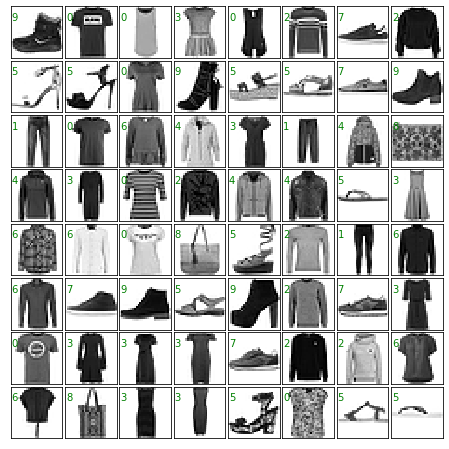

In [9]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]), color ='green')

Vérifions que les données de Train et de Test sont bien équilibrées (balanced)

<BarContainer object of 10 artists>

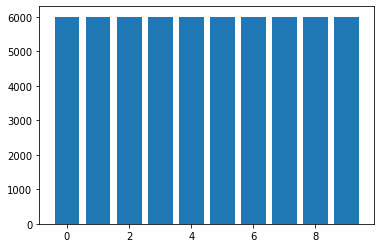

In [34]:
import collections
w=collections.Counter(y_train)
plt.bar(w.keys(), w.values())

<BarContainer object of 10 artists>

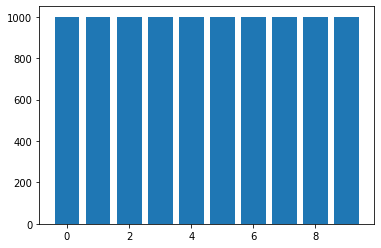

In [35]:
import collections
w=collections.Counter(y_test)
plt.bar(w.keys(), w.values())

# 2. Algorithmes Machine Learning traditionnel

Nous allons utiliser quelques algorithmes du Machine Learning traditionnel évoqués en cours, afin de prédire la variable cible ( labels_images ou y_train.

Ainsi, nous allons calculer les performances du modèle en utilisant les métriques appropriées à chaque problème.

# 2.1 Traditional Machine Learning (Régresssion Logistique)



Commençons par le modèle de régression logistique pour la gestion des multi-class.

Les dimensions de x_train sont (60000, 28, 28).

Nous allons d'abord l'applatir

In [10]:
d1 , d2, d3 =  x_train.shape
x_train_flat = x_train.reshape(d1, d2*d3)

d1 , d2, d3 =  x_test.shape
x_test_flat = x_test.reshape(d1, d2*d3)

On spécifie la méthode 'One Vs Rest' ('ovr') pour la gestion du multi-class. Construisons un modèle de Logistic Regression avec le solver 'saga'.

Entrainons notre modèle (.fit)

Puis calculons les prédictions afin d'évaluer les résultats

In [37]:
#Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

#Create a Logistic Regression Classifier
classifierRL = LogisticRegression(multi_class ='ovr', solver='saga')

#Train the model using the training sets
classifierRL.fit(x_train_flat, y_train)

#Predict the response for train dataset
y_pred_train_RL = classifierRL.predict(x_train_flat)

#Predict the response for test dataset
y_pred_test_RL = classifierRL.predict(x_test_flat)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

Evaluons notre modèle.

Nous allons nous limiter ici sur la metric Accuracy car les classes sont équilibrées.

In [38]:
# Model Accuracy: how often is the classifier correct?
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train_RL))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_test_RL))

Train Accuracy: 0.8717
Test Accuracy: 0.8426


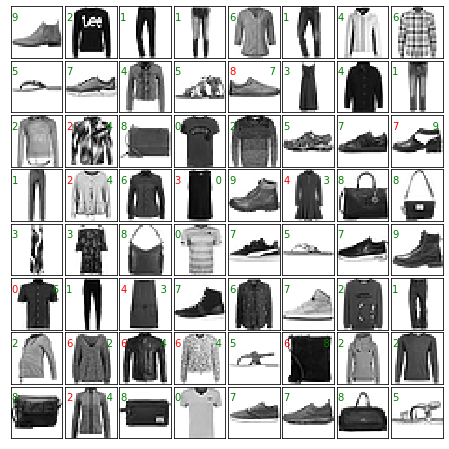

In [39]:
# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[i], cmap=plt.cm.binary,
              interpolation='nearest')
    # label the image with the target value
    if y_pred_test_RL[i] == y_test[i]:
        ax.text(0, 7, str(y_pred_test_RL[i]), color='green')
    else:
        ax.text(0, 7, str(y_pred_test_RL[i]), color='red')
        ax.text(0, 7, '             '+str(y_test[i]), color='green')

Examinons uniquement les erreurs

In [40]:
#Affichons d'abord le nombre d'erreur
nbrError = 0
for i in range(10000):
    if y_pred_test_RL[i] != y_test[i]:
        nbrError = nbrError +1
print("Le nombre d'erreur est: ",nbrError)     

Le nombre d'erreur est:  1574


La valeur d'accuracy parait faiblement bonne, ainsi est ce qu'on peut considérer que le nombre des erreurs est tolérable ?

Essayons, donc, un autre modèle du machine learning.

# 2.2: Traditional Machine Learning (SVM avec un kernel non linéaire)

La stratégie multi class implémentée pour SVC est 'one-vs-rest'.

Entrainons un classificateur SVM avec un kernel 'rbf' (radial basis function, abordé dans les labs du cour).

Nous allons d'abord convertir la dimension de notre DataSet de 2D à une seule dimension, afin de pouvoir mieux interpréter les résultats et avoir plus de simplicité.

In [14]:
# Conversion the 2d array of DataSet into a 1d array
def convert(nparray):
    l=[]
    dims=nparray.shape
    for i in range(dims[0]):
        l.append(nparray[i].flatten())
    l=np.array(l)
    return l
x_train_mod = convert(x_train)
x_test_mod  = convert(x_test)

In [42]:
# Checking the distribution of labels
for i in range(10):
    print ('Train label ' + str(i) + ' count :' + str(len([j for j in y_train if j==i])))
    print ('Test label ' + str(i) + ' count :' + str(len([j for j in y_test if j==i])))


Train label 0 count :6000
Test label 0 count :1000
Train label 1 count :6000
Test label 1 count :1000
Train label 2 count :6000
Test label 2 count :1000
Train label 3 count :6000
Test label 3 count :1000
Train label 4 count :6000
Test label 4 count :1000
Train label 5 count :6000
Test label 5 count :1000
Train label 6 count :6000
Test label 6 count :1000
Train label 7 count :6000
Test label 7 count :1000
Train label 8 count :6000
Test label 8 count :1000
Train label 9 count :6000
Test label 9 count :1000


Construisons notre modèle.

In [15]:
#Import  model
from sklearn.svm import SVC

#Create an SVM Classifier
classifierSVMrbf = SVC(kernel='rbf', C=100, gamma='auto')
classifierSVMrbf.fit(x_train_mod, y_train)

SVC(C=100, gamma='auto')

In [16]:
#Predict the response for test dataset
y_pred_test_rbf = classifierSVMrbf.predict(x_test_mod)
y_pred_train_rbf = classifierSVMrbf.predict(x_train_mod)

Evaluons notre modèle.

In [17]:
# Model Accuracy: how often is the classifier correct?
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train_rbf))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_test_rbf))

Train Accuracy: 0.9381666666666667
Test Accuracy: 0.8804


La valeur d'accuracy est légèrement meilleur en utilisant un SVM non linéaire (0.8804) qu'en utilisant la régression logistique avec une valeur de 0.8426 . 

En revanche, on constate qu'on est en situation d'overfitting en utilisant le classificateur SVM, dont l'accurcay du Test Set est moins inférieure à celle du Training Set. Ce qui n'a pas été le cas en utilisant la régression logistique.

De ce fait, est ce qu'on peut avoir des meilleures performances en utilisant d'autres méthodes? A savoir le DNN qui a été prouvé plus performant auprès des DataSet volumineux. Ce qui est notre cas.


# 3. Architechtures réseaux de neuronnes

Nous allons, maintenant, utiliser les différentes architectures des réseaux de neurones afin de prédire la variable cible. 

Ensuite, nous calculerons les performances du modèle en utilisant les métriques appropriées au problème.

#3.1 Classificateur 1: Fully Connected 3 layers NN

Construisons notre modèle.

In [18]:
# on choisi un NN séquentiel
classifierNN3L = models.Sequential()

# on rajoute les layers qu on veut
classifierNN3L.add(layers.InputLayer(input_shape=(28,28,)))
classifierNN3L.add(layers.Flatten())
classifierNN3L.add(layers.Dense(64, activation='relu', name = "Hidden_Layer_1"))
classifierNN3L.add(layers.Dense(64, activation='relu', name = "Hidden_Layer_2"))
classifierNN3L.add(layers.Dense(10, activation='softmax', name = "Output_Layer"))

#affichons un résumé de notre modèle
classifierNN3L.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 64)                50240     
                                                                 
 Hidden_Layer_2 (Dense)      (None, 64)                4160      
                                                                 
 Output_Layer (Dense)        (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Compilons notre modèle:

Nous choisissons comme otpimizer ADAM, tout en sachant que cet optimizer a prouvé, selon les architechtures testées et les plus utilisées, une nette amélioration de la métrique Accuracy.
  
Ainsi, comme loss fonction : sparse cetegorical cross entropy, et comme metric à calculer après chaque epoch: accuracy.

In [19]:
# Choisissons certains Hyperparameters
training_epochs = 100

classifierNN3L.compile(optimizer=keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

classifierNN3L.fit(x_train, y_train, epochs=training_epochs)



Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 5s 2ms/step - loss: 0.5079 - accuracy: 0.8207
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3737 - accuracy: 0.8642
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3415 - accuracy: 0.8745
Epoch 4/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3206 - accuracy: 0.8820
Epoch 5/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3022 - accuracy: 0.8880
Epoch 6/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2874 - accuracy: 0.8932
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2769 - accuracy: 0.8968
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2683 - accuracy: 0.8989
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2590 - accuracy: 0.9027
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2500 

In [21]:
eval = classifierNN3L.evaluate(x_test,  y_test, verbose=2)
print(eval)

313/313 - 1s - loss: 0.4929 - accuracy: 0.8273 - 650ms/epoch - 2ms/step
[0.49292320013046265, 0.8273000121116638]


#3.2 Early stopping

Pour mieux observer l'overfitting : divisons notre training data en tranining et validation, et observons les performances du modèle sur le traning et validation tout au long des epoch.

Nous pouvons reserver des données de validation automatiquement à travers l'argument validation_split

Sachant que, plus on augmente le nombre des épochs, plus on augmente la probabilité d'overfitting. L'accuracy du Training Set s'améliore, alors que celle du Test Set reste nettement inférieure (dont ce n'est pas le résulat recherché).

Construisons d'abord le meme modèle que le précédent.

In [22]:
# on choisi un NN séquentiel
classifierNN3L = models.Sequential()

# on rajoute les layers qu on veut
classifierNN3L.add(layers.InputLayer(input_shape=(28,28,)))
classifierNN3L.add(layers.Flatten())
classifierNN3L.add(layers.Dense(64, activation='relu', name = "Hidden_Layer_1"))
classifierNN3L.add(layers.Dense(64, activation='relu', name = "Hidden_Layer_2"))
classifierNN3L.add(layers.Dense(10, activation='softmax', name = "Output_Layer"))

#affichons un résumé de notre modèle
classifierNN3L.summary()

training_epochs = 100

classifierNN3L.compile(optimizer=keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

classifierNN3L.fit(x_train, y_train, epochs=training_epochs, validation_split = 0.1, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])     

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 64)                50240     
                                                                 
 Hidden_Layer_2 (Dense)      (None, 64)                4160      
                                                                 
 Output_Layer (Dense)        (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5201 - accuracy: 0.8169 - val_loss: 0.4053 - val_accuracy: 0.8563
Epoch 2/100
1688/1688 [==============

In [23]:
eval_early_stopping = classifierNN3L.evaluate(x_test,  y_test, verbose=2)
print(eval)

313/313 - 0s - loss: 0.3406 - accuracy: 0.8841 - 404ms/epoch - 1ms/step
[0.49292320013046265, 0.8273000121116638]


On remarque une légère amélioration de la valeur d'accuracy en utilisant le EarlyStopping callback.

# 3.2 Classificateur 2: CNN avec architecture inspirée de LeNet5

Nous allons à présent implémenter une architecture inspirée de LeNet5, vu en cour.

Rappel: L'archi LeNet5 comporte ces composants:

Couche convolution: 6 filtres (5*5) , stride = 1

Couche Pooling: Average Pooling (2*2), stride = 2

Couche Convolution: 16 filtres (5*5), stride = 1

Couche Pooling: : Average Pooling (2*2), stride = 2

Couche Dense (120)

Couche Dense (84)

Couche Output Dense (10)

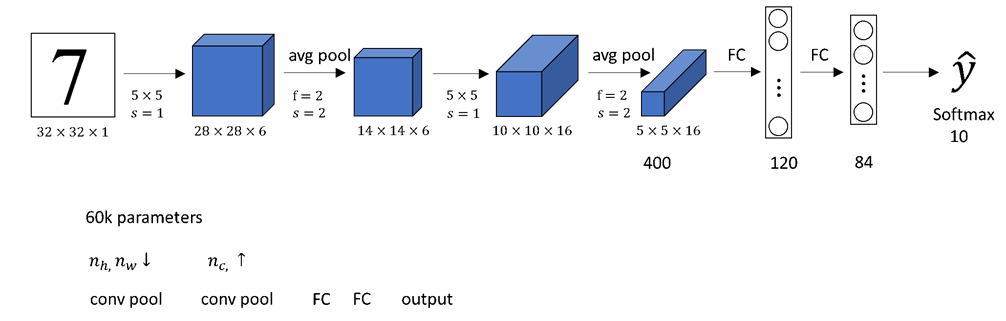



In [24]:
modelLeNet = models.Sequential()

# la couche input
modelLeNet.add(layers.InputLayer(input_shape=(28,28,1)))
# les couches convolution et pooling
modelLeNet.add(layers.Conv2D(6, (5, 5), activation='relu'))
modelLeNet.add(layers.MaxPooling2D((2, 2), strides=2))
modelLeNet.add(layers.Conv2D(15, (5, 5), activation='relu'))
modelLeNet.add(layers.MaxPooling2D((2, 2), strides=2))

# on rajoute les layers du fully conneced, on applatit le volume final d'abord
modelLeNet.add(layers.Flatten(input_shape = (28,28,1)))
modelLeNet.add(layers.Dense(120, activation='relu'))
modelLeNet.add(layers.Dense(84, activation='relu'))
modelLeNet.add(layers.Dense(10, activation='softmax'))

#affichons un résumé de notre modèle
modelLeNet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 15)          2265      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 15)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 240)               0         
                                                                 
 dense (Dense)               (None, 120)              

Compilons puis entrainons notre modèle.

Pour observer les performances du modèle, il est intéressant d'utiliser un ensemble de validation et comparer les performances dans chaque epoch.

In [6]:
modelLeNet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

training_epochs = 10

history = modelLeNet.fit(x_train, y_train, validation_split = 0.1, epochs=training_epochs)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1929/1929 [==============================] - 33s 16ms/step - loss: 0.5468 - accuracy: 0.8023 - val_loss: 0.3997 - val_accuracy: 0.8542
Epoch 2/10
1929/1929 [==============================] - 36s 18ms/step - loss: 0.3650 - accuracy: 0.8670 - val_loss: 0.3452 - val_accuracy: 0.8745
Epoch 3/10
1929/1929 [==============================] - 31s 16ms/step - loss: 0.3209 - accuracy: 0.8829 - val_loss: 0.3309 - val_accuracy: 0.8765
Epoch 4/10
1929/1929 [==============================] - 31s 16ms/step - loss: 0.2930 - accuracy: 0.8913 - val_loss: 0.3213 - val_accuracy: 0.8805
Epoch 5/10
1929/1929 [==============================] - 31s 16ms/step - loss: 0.2718 - accuracy: 0.8984 - val_loss: 0.3077 - val_accuracy: 0.8845
Epoch 6/10
1929/1929 [==============================] - 30s 16ms/step - loss: 0.2586 - accuracy: 0.9037 - val_loss: 0.2938 - val_accuracy: 0.8907
Epoch 7/10
1929/1929 [==============================] - 32s 16ms/step - loss: 0.2449 - accuracy: 0.9095 - val_loss: 0.2892 - val_accura

Affichons l'évolution des performances par epoch pour les données train et validation.

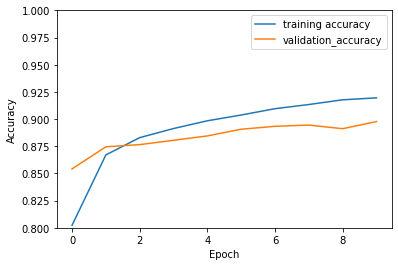

In [7]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy' )
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='upper right')

In [63]:
# performances sur le test set
test_loss, test_acc = modelLeNet.evaluate(x_test, y_test, verbose=2)


313/313 - 2s - loss: 0.3587 - accuracy: 0.8934 - 2s/epoch - 6ms/step


En conclusion, on peut dire que l'architecture inspirée de LENET5 a prouvé les meilleurs performances, tout en testant les meilleurs combinaisons des hyperparamètres choisis et (epochs, pourcentage du split des données de validation & training...)
